dataset link: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense,Flatten, Input, Dropout


In [5]:

import warnings 
warnings.filterwarnings('ignore')

In [6]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
# Load Xception model
base = Xception(weights="imagenet", input_shape =(299,299,3),include_top= False)
# set base model trainable to false
for layers in base.layers:
    layers.trainable=False
 
# base.summary()

In [27]:
path = '/home/prasad/Downloads/COVID-19 Radiography Database/data/'
batch_size = 32

# Define augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.25,
        horizontal_flip =True
        )
 
# apply augmentations on dataset
train =train_datagen.flow_from_directory(
    path,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
val =train_datagen.flow_from_directory(
    path,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

class_names=['covid-19','normal','viral pneumonia']
 
# code to plot images
def plotImages(images_arr, labels):
    fig, axes = plt.subplots(8, 4, figsize=(20,80))
    axes = axes.flatten()
    label=0
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_title(class_names[np.argmax(labels[label])])
        label=label+1
    plt.show()


Found 11365 images belonging to 3 classes.
Found 3788 images belonging to 3 classes.


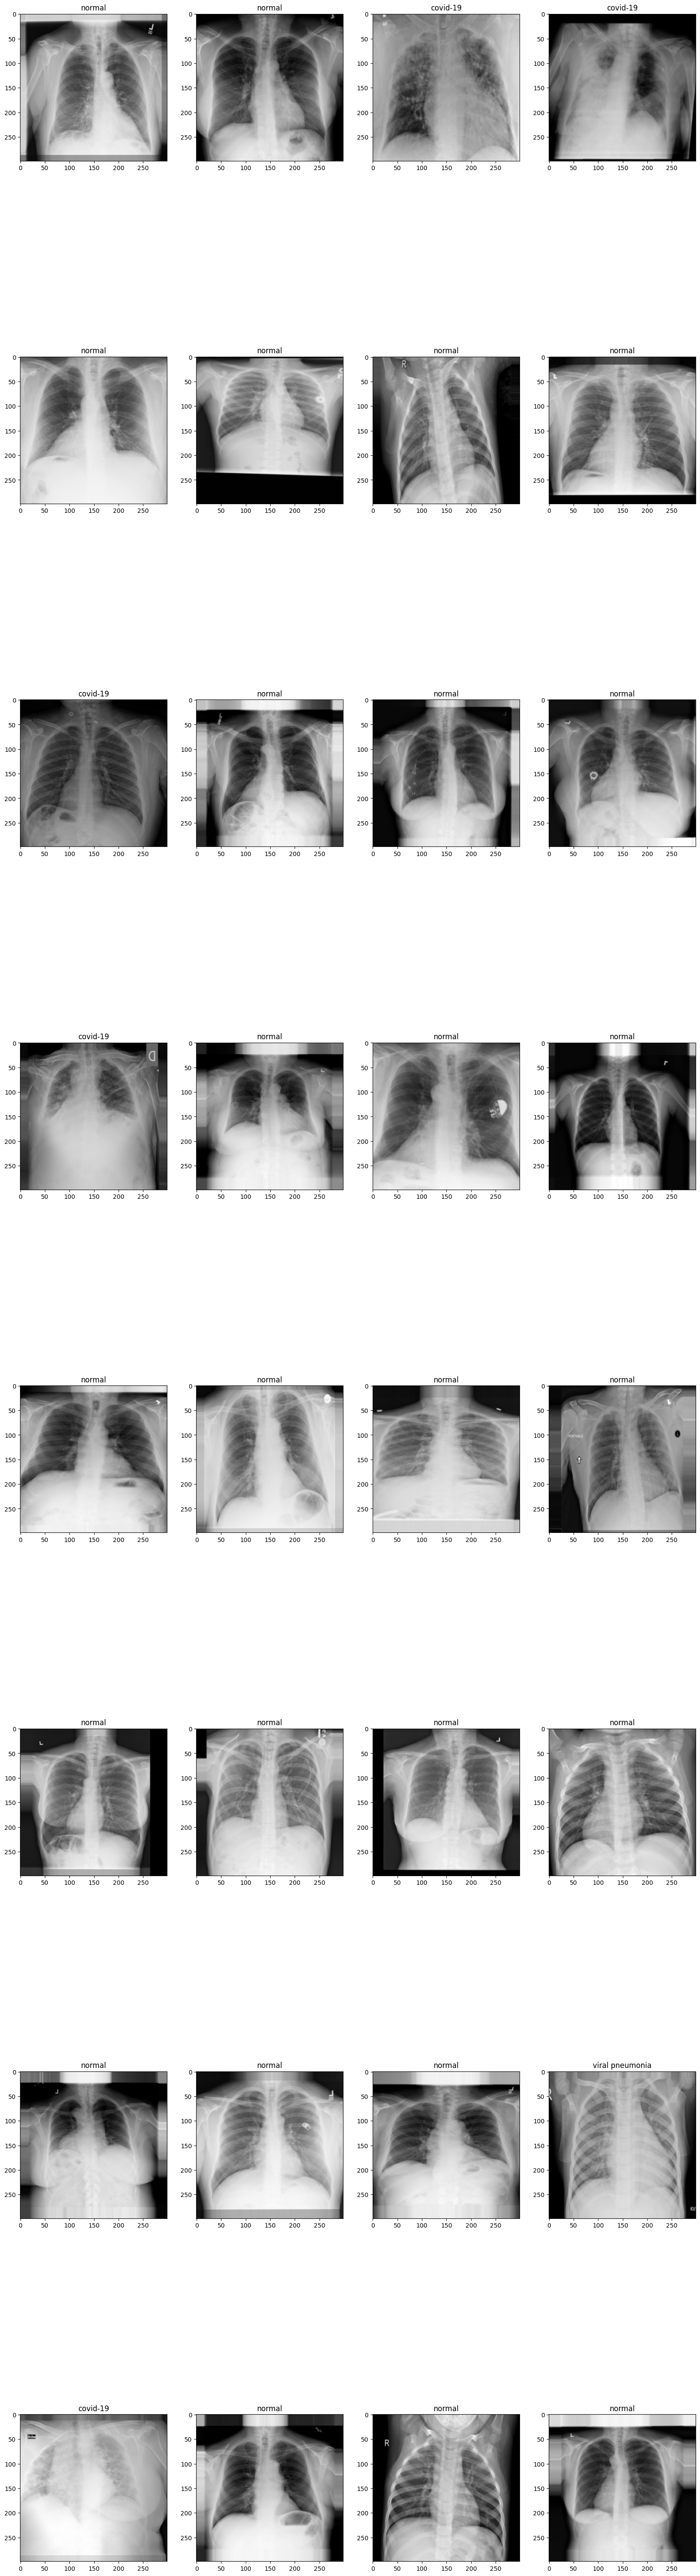

In [28]:
batch = train.next()
images = batch[0]
labels = batch[1]

# plot images with labels
plotImages(images,labels)

In [29]:

# Define our complete models
model = Sequential()
model.add(Input(shape =(299,299,3)))
model.add(base)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 dropout_2 (Dropout)         (None, 10, 10, 2048)      0         
                                                                 
 flatten_1 (Flatten)         (None, 204800)            0         
                                                                 
 dropout_3 (Dropout)         (None, 204800)            0         
                                                                 
 dense_2 (Dense)             (None, 16)                3276816   
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 24,138,347
Trainable params: 3,276,867
N

In [31]:
# import adam optimizer
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# compile model(define metrics and loss)
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

es = EarlyStopping(patience=3,
                   monitor='val_accuracy',
                   restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss',
                       patience=2,
                       factor=0.5,
                       verbose=1)

# train model for 30 epoch
model.fit(train,epochs=30,validation_data=val,
         callbacks = [es, lr])
 
# save model
model.save('epoch_30.h5')

Epoch 1/30


2023-08-15 22:17:11.187229: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2023-08-15 22:17:11.818222: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-15 22:17:11.818676: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-15 22:17:11.818711: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-08-15 22:17:11.819339: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-15 22:17:11.819403: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-08-15 22:17:13.381558: W tensorflow/core/common_runtime/bf

  1/356 [..............................] - ETA: 25:19 - loss: 1.1420 - accuracy: 0.4688

2023-08-15 22:17:13.693586: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


356/356 [==============================] - 149s 409ms/step - loss: 2.4303 - accuracy: 0.8470 - val_loss: 1.6790 - val_accuracy: 0.8928 - lr: 0.0010
Epoch 2/30
356/356 [==============================] - 134s 377ms/step - loss: 1.0826 - accuracy: 0.8932 - val_loss: 1.3087 - val_accuracy: 0.8957 - lr: 0.0010
Epoch 3/30
356/356 [==============================] - 134s 375ms/step - loss: 0.4902 - accuracy: 0.9125 - val_loss: 0.5270 - val_accuracy: 0.9089 - lr: 0.0010
Epoch 4/30
356/356 [==============================] - 130s 366ms/step - loss: 0.3292 - accuracy: 0.9246 - val_loss: 0.5275 - val_accuracy: 0.9102 - lr: 0.0010
Epoch 5/30
356/356 [==============================] - 130s 366ms/step - loss: 0.1982 - accuracy: 0.9404 - val_loss: 0.2872 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 6/30
356/356 [==============================] - 131s 367ms/step - loss: 0.1680 - accuracy: 0.9418 - val_loss: 0.1873 - val_accuracy: 0.9414 - lr: 0.0010
Epoch 7/30
356/356 [==============================] - 131